# Prep Data

The code in this section is purely for testing purposes to ensure the code is error free. For the final version, we'll use the data prep code from the consolidated file.

In [1]:
# data manipulation
import numpy as np
import pandas as pd 

import os
import zipfile

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# splitting
from sklearn.model_selection import train_test_split

# preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

# pipelines
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# tuning
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate

# model evaluation
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix

# new
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [2]:
# This dataset contains only 10k records from the training file to speed up run time of this code.
data = pd.read_csv("../data/train_clean_10k.csv")

In [3]:
data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,BUR_CREDIT_TYPE_Mortgage_mean,BUR_CREDIT_TYPE_Mortgage_sum,BUR_CREDIT_TYPE_Real estate loan_mean,BUR_CREDIT_TYPE_Unknown type of loan_mean,BUR_CREDIT_TYPE_Unknown type of loan_sum,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO,CREDIT_LENGTH,CREDIT_AGE_RATIO,HAS_LIBAILITY
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,0.0,0.0,0.0,0.0,0.0,2.007889,0.121978,0.060749,-42.976165,1
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0.0,0.0,0.0,0.0,0.0,4.790750,0.132217,0.027598,-77.154936,3
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,2.000000,0.100000,0.050000,-7.088102,0
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,NaN,NaN,NaN,NaN,NaN,2.316167,0.219900,0.094941,-16.452644,1
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,0.0,0.0,0.0,0.0,0.0,4.222222,0.179963,0.042623,-25.737508,1


In [4]:
data_cols = list(data.columns)
data_cols

['Unnamed: 0',
 'SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AV

In [5]:
X = data.drop(['SK_ID_CURR', 'TARGET'], axis = 1)
y = data['TARGET']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=42)

In [7]:
# Second split for hyperparameter tuning
x_sample_10, x_sample_90, y_sample_10, y_sample_90 = train_test_split(x_train, y_train, stratify=y_train, 
                                                                      test_size=.9, random_state=42)

In [8]:
categorical_features = ['NAME_CONTRACT_TYPE', # start of loan features
                        'NAME_TYPE_SUITE',
                        'NAME_INCOME_TYPE', # start of client demographic features
                        'NAME_EDUCATION_TYPE',
                        'CODE_GENDER', 
                        'NAME_FAMILY_STATUS', # start of family features
                        'NAME_HOUSING_TYPE', # start of housing features
                        'HOUSETYPE_MODE',
#                         'FONDKAPREMONT_MODE',
                        'WALLSMATERIAL_MODE',
                        'EMERGENCYSTATE_MODE',
                        'FLAG_OWN_CAR', # start of property owned features
                        'FLAG_OWN_REALTY',
                        'OCCUPATION_TYPE', # start of occupation features
                        'ORGANIZATION_TYPE',
                        'HOUR_APPR_PROCESS_START', # start of application process time features
                        'WEEKDAY_APPR_PROCESS_START',
                        'REGION_RATING_CLIENT', # start of region features
#                         'REGION_RATING_CLIENT_W_CITY'
                       ]

In [9]:
numerical_features = [x for x in data_cols if x not in categorical_features]
numerical_features.remove("Unnamed: 0")
numerical_features.remove("SK_ID_CURR")
numerical_features.remove("TARGET")
numerical_features

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'NONLIVINGAREA_AVG',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCU

In [10]:
# create pipeline for numeric features
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# create pipeline for categorical features
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value="Unknown")),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

# specify the column transformer for numeric and categorical features
data_pipeline = ColumnTransformer(
    [("num_pipeline", num_pipeline, numerical_features),
    ("cat_pipeline", cat_pipeline, categorical_features)],
    remainder='passthrough')

# Hyperparameter Tuning

## Perceptron

### Grid Search

In [11]:
perceptron_params = { 
    'perceptron__alpha': (10, 1, 0.1, 0.01, 0.001),
    'perceptron__penalty': ('l1', 'l2', 'elasticnet'),
}

In [12]:
# generate the pipeline
perceptron_pipeline = Pipeline([
    ("preparation", data_pipeline),
    ("perceptron", Perceptron(random_state=42))
])

# set up cross validation grid search
perceptron_grid_search = GridSearchCV(perceptron_pipeline,
                                    param_grid=perceptron_params,
                                    scoring='roc_auc',
                                    cv=5,
                                    n_jobs=-1,
                                    verbose=True)

# grid search on training data
perceptron_grid_search.fit(x_sample_10, y_sample_10)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   20.8s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                                          'AMT_CREDIT',
                                         

In [13]:
# print grid search results
pd.concat([pd.DataFrame(perceptron_grid_search.cv_results_["params"]),pd.DataFrame(perceptron_grid_search.cv_results_["mean_test_score"], 
                                                                            columns=["roc_auc"])],axis=1).sort_values(by = 'roc_auc', ascending=False)

,perceptron__alpha,perceptron__penalty,roc_auc
6,0.100,l1,0.506384
1,10.000,l2,0.500000
2,10.000,elasticnet,0.500000
4,1.000,l2,0.500000
5,1.000,elasticnet,0.500000
12,0.001,l1,0.493530
0,10.000,l1,0.493468
3,1.000,l1,0.493468
9,0.010,l1,0.493321
13,0.001,l2,0.493321


In [14]:
# print the best parameters
perceptron_grid_search.best_params_

{'perceptron__alpha': 0.1, 'perceptron__penalty': 'l1'}

### Cross Validation

In [15]:
# perform 5 fold cv with best hyperparameters
scoring = {'accuracy': 'accuracy',
           'roc_auc': 'roc_auc',
          }

#### Cross Validation Evaluation
results = cross_validate(perceptron_grid_search.best_estimator_, 
                          x_sample_90, y_sample_90,
                          scoring=scoring,
                          cv=5,
                          n_jobs=-1)

In [16]:
# print results of cross validation
pd.DataFrame(
    {'test_accuracy': results['test_accuracy'], 
     'test_roc_auc': results['test_roc_auc'], 
    })

,test_accuracy,test_roc_auc
0,0.922222,0.500000
1,0.922222,0.469315
2,0.922222,0.496235
3,0.922917,0.478582
4,0.922917,0.500000


In [17]:
# calculate mean out of sample cv train roc score 
perceptron_train_mean_roc_score = np.nanmean(results['test_roc_auc'])

# print the mean out of sample cv train roc score
perceptron_train_mean_roc_score

0.4888264237373711

In [18]:
# calculate mean out of sample cv train accuracy score 
perceptron_train_mean_accuracy_score = np.nanmean(results['test_accuracy'])

# print the mean out of sample cv train accuracy score
perceptron_train_mean_accuracy_score

0.9225

## Multi Layer Perceptron

### Grid Search

In [19]:
perceptronmulti_params = { 
    'perceptronmulti__hidden_layer_sizes': (10, 100, 500),
    'perceptronmulti__activation': ('logistic', 'tanh', 'relu'),
}

In [20]:
# generate the pipeline
perceptronmulti_pipeline = Pipeline([
    ("preparation", data_pipeline),
    ("perceptronmulti", MLPClassifier(random_state=42))
])

# set up cross validation grid search
perceptronmulti_grid_search = GridSearchCV(perceptronmulti_pipeline,
                                    param_grid=perceptronmulti_params,
                                    scoring='roc_auc',
                                    cv=5,
                                    n_jobs=-1,
                                    verbose=True)

# grid search on training data
perceptronmulti_grid_search.fit(x_sample_10, y_sample_10)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.6min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                                          'AMT_CREDIT',
                                         

In [21]:
# print grid search results
pd.concat([pd.DataFrame(perceptronmulti_grid_search.cv_results_["params"]),pd.DataFrame(perceptronmulti_grid_search.cv_results_["mean_test_score"], 
                                                                            columns=["roc_auc"])],axis=1).sort_values(by = 'roc_auc', ascending=False)

,perceptronmulti__activation,perceptronmulti__hidden_layer_sizes,roc_auc
1,logistic,100,0.570486
2,logistic,500,0.544704
7,relu,100,0.526255
5,tanh,500,0.513964
4,tanh,100,0.513722
6,relu,10,0.501336
8,relu,500,0.500951
0,logistic,10,0.496458
3,tanh,10,0.466631


In [22]:
# print the best parameters
perceptronmulti_grid_search.best_params_

{'perceptronmulti__activation': 'logistic',
 'perceptronmulti__hidden_layer_sizes': 100}

### Cross Validation

In [23]:
# perform 5 fold cv with best hyperparameters
scoring = {'accuracy': 'accuracy',
           'roc_auc': 'roc_auc',
          }

#### Cross Validation Evaluation
results = cross_validate(perceptronmulti_grid_search.best_estimator_, 
                          x_sample_90, y_sample_90,
                          scoring=scoring,
                          cv=5,
                          n_jobs=-1)

In [24]:
# print results of cross validation
pd.DataFrame(
    {'test_accuracy': results['test_accuracy'], 
     'test_roc_auc': results['test_roc_auc'], 
    })

,test_accuracy,test_roc_auc
0,0.919444,0.710783
1,0.916667,0.729541
2,0.920833,0.707367
3,0.910417,0.678970
4,0.920139,0.704072


In [25]:
# calculate mean out of sample cv train roc score 
perceptronmulti_train_mean_roc_score = np.nanmean(results['test_roc_auc'])

# print the mean out of sample cv train roc score
perceptronmulti_train_mean_roc_score

0.7061466791340505

In [26]:
# calculate mean out of sample cv train accuracy score 
perceptronmulti_train_mean_accuracy_score = np.nanmean(results['test_accuracy'])

# print the mean out of sample cv train accuracy score
perceptronmulti_train_mean_accuracy_score

0.9175000000000001

## Support Vector Machine

### Grid Search

In [27]:
svm_params = {
    'svm__C': (.1, 1),
    'svm__kernel': ('linear', 'poly'),
    'svm__degree': (1,2)
}

In [28]:
# generate the pipeline
svm_pipeline = Pipeline([
    ("preparation", data_pipeline),
    ("svm", SVC(random_state=42, probability=True))
])

# set up cross validation grid search
svm_grid_search = GridSearchCV(svm_pipeline,
                                    param_grid=svm_params,
                                    scoring='roc_auc',
                                    cv=5,
                                    n_jobs=-1,
                                    verbose=True)

# grid search on training data
svm_grid_search.fit(x_sample_10, y_sample_10)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 87.3min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                                          'AMT_CREDIT',
                                         

In [29]:
# print grid search results
pd.concat([pd.DataFrame(svm_grid_search.cv_results_["params"]),pd.DataFrame(svm_grid_search.cv_results_["mean_test_score"], 
                                                                            columns=["roc_auc"])],axis=1).sort_values(by = 'roc_auc', ascending=False)

,svm__C,svm__degree,svm__kernel,roc_auc
1,0.1,1,poly,0.594250
5,1.0,1,poly,0.594250
3,0.1,2,poly,0.570951
7,1.0,2,poly,0.570951
0,0.1,1,linear,0.559289
2,0.1,2,linear,0.559289
4,1.0,1,linear,0.556584
6,1.0,2,linear,0.556584


In [30]:
# print the best parameters
svm_grid_search.best_params_

{'svm__C': 0.1, 'svm__degree': 1, 'svm__kernel': 'poly'}

### Cross Validation

In [31]:
# perform 5 fold cv with best hyperparameters
scoring = {'accuracy': 'accuracy',
           'roc_auc': 'roc_auc',
          }

#### Cross Validation Evaluation
results = cross_validate(svm_grid_search.best_estimator_, 
                          x_sample_90, y_sample_90,
                          scoring=scoring,
                          cv=5,
                          n_jobs=-1)

In [32]:
# print results of cross validation
pd.DataFrame(
    {'test_accuracy': results['test_accuracy'], 
     'test_roc_auc': results['test_roc_auc'], 
    })

,test_accuracy,test_roc_auc
0,0.922222,0.621013
1,0.922222,0.589830
2,0.922222,0.605496
3,0.922917,0.604275
4,0.922917,0.661671


In [33]:
# calculate mean out of sample cv train roc score 
svm_train_mean_roc_score = np.nanmean(results['test_roc_auc'])

# print the mean out of sample cv train roc score
svm_train_mean_roc_score

0.6164568840848664

In [34]:
# calculate mean out of sample cv train accuracy score 
svm_train_mean_accuracy_score = np.nanmean(results['test_accuracy'])

# print the mean out of sample cv train accuracy score
svm_train_mean_accuracy_score

0.9225

# Model Evaluation

In [35]:
# initialize the test results data frame
results = pd.DataFrame(columns=['model', 'Experiment', 'Train Accuracy', 'Test Accuracy', 'Train Area under ROC', 'Test Area under ROC', 'Best Parameters'])

## Perceptron

I couldn't get the roc score code for perceptron to work - maybe someone can play around with it if we decide to include this in our phase 3 submission. It works for multi-layer perceptron, so maybe we just exclude the first perceptron where it doesn't work.

In [36]:
# fit best estimator on entire training data
perceptron_clf = perceptron_grid_search.best_estimator_.fit(x_train, y_train)

# generate predictions on test data
perceptron_predictions = perceptron_clf.predict(x_test)

# calculate score on test predictions
perceptron_test_score = accuracy_score(y_test, perceptron_predictions)

# calculate roc_auc score on test predictions
# perceptron_test_roc_score = roc_auc_score(y_test, perceptron_clf.predict_proba(x_test)[:, 1])

# calculate classification report on test predictions
perceptron_test_classification_report = classification_report(y_test, perceptron_predictions)

# calculate confusion matrix on test predictions
perceptron_test_confusion_matrix = confusion_matrix(y_test, perceptron_predictions)

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# display the classification report
print(perceptron_test_classification_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1845
           1       0.08      1.00      0.14       155

    accuracy                           0.08      2000
   macro avg       0.04      0.50      0.07      2000
weighted avg       0.01      0.08      0.01      2000



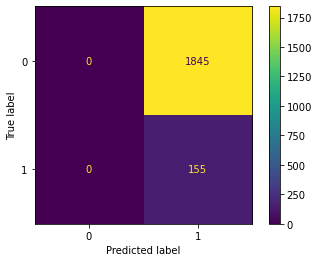

In [38]:
# plot confusion matrix
plot_confusion_matrix(perceptron_clf, x_test, y_test)
plt.show()

In [39]:
# add accuracy score to results table
results.loc[0] = ['Perceptron', 'All data from all sub files', np.round(perceptron_train_mean_accuracy_score*100, 2), 
                  np.round(perceptron_test_score*100, 2), np.round(perceptron_train_mean_roc_score*100, 2), 
#                   np.round(perceptron_test_roc_score*100, 2)
                  "N/A"
                  , perceptron_grid_search.best_params_]

# show results
results

,model,Experiment,Train Accuracy,Test Accuracy,Train Area under ROC,Test Area under ROC,Best Parameters
0,Perceptron,All data from all sub files,92.25,7.75,48.88,N/A,"{'perceptron__alpha': 0.1, 'perceptron__penalt..."


## Multi Layer Perceptron

In [40]:
# fit best estimator on entire training data
perceptronmulti_clf = perceptronmulti_grid_search.best_estimator_.fit(x_train, y_train)

# generate predictions on test data
perceptronmulti_predictions = perceptronmulti_clf.predict(x_test)

# calculate score on test predictions
perceptronmulti_test_score = accuracy_score(y_test, perceptronmulti_predictions)

# calculate roc_auc score on test predictions
perceptronmulti_test_roc_score = roc_auc_score(y_test, perceptronmulti_clf.predict_proba(x_test)[:, 1])

# calculate classification report on test predictions
perceptronmulti_test_classification_report = classification_report(y_test, perceptronmulti_predictions)

# calculate confusion matrix on test predictions
perceptronmulti_test_confusion_matrix = confusion_matrix(y_test, perceptronmulti_predictions)

In [41]:
# display the classification report
print(perceptronmulti_test_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1845
           1       0.14      0.03      0.04       155

    accuracy                           0.91      2000
   macro avg       0.53      0.51      0.50      2000
weighted avg       0.86      0.91      0.88      2000



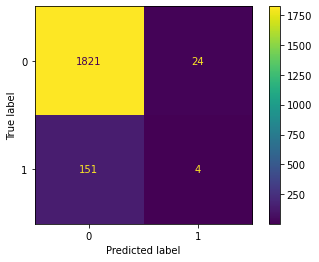

In [42]:
# plot confusion matrix
plot_confusion_matrix(perceptronmulti_clf, x_test, y_test)
plt.show()

In [43]:
# add accuracy score to results table
results.loc[1] = ['Multi Layer Perceptron', 'All data from all sub files', np.round(perceptronmulti_train_mean_accuracy_score*100, 2), np.round(perceptronmulti_test_score*100, 2), np.round(perceptronmulti_train_mean_roc_score*100, 2), np.round(perceptronmulti_test_roc_score*100, 2), perceptronmulti_grid_search.best_params_]

# show results
results

,model,Experiment,Train Accuracy,Test Accuracy,Train Area under ROC,Test Area under ROC,Best Parameters
0,Perceptron,All data from all sub files,92.25,7.75,48.88,N/A,"{'perceptron__alpha': 0.1, 'perceptron__penalt..."
1,Multi Layer Perceptron,All data from all sub files,91.75,91.25,70.61,64.64,"{'perceptronmulti__activation': 'logistic', 'p..."


## Support Vector Machine

In [44]:
# fit best estimator on entire training data
svm_clf = svm_grid_search.best_estimator_.fit(x_train, y_train)

# generate predictions on test data
svm_predictions = svm_clf.predict(x_test)

# calculate score on test predictions
svm_test_score = accuracy_score(y_test, svm_predictions)

# calculate roc_auc score on test predictions
svm_test_roc_score = roc_auc_score(y_test, svm_clf.predict_proba(x_test)[:, 1])

# calculate classification report on test predictions
svm_test_classification_report = classification_report(y_test, svm_predictions)

# calculate confusion matrix on test predictions
svm_test_confusion_matrix = confusion_matrix(y_test, svm_predictions)

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# display the classification report
print(svm_test_classification_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1845
           1       0.00      0.00      0.00       155

    accuracy                           0.92      2000
   macro avg       0.46      0.50      0.48      2000
weighted avg       0.85      0.92      0.89      2000



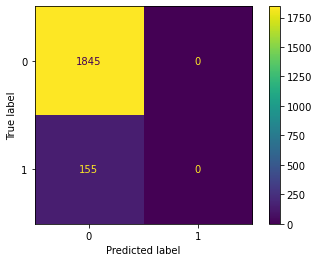

In [46]:
# plot confusion matrix
plot_confusion_matrix(svm_clf, x_test, y_test)
plt.show()

In [47]:
# add accuracy score to results table
results.loc[2] = ['SVM', 'All data from all sub files', np.round(svm_train_mean_accuracy_score*100, 2), np.round(svm_test_score*100, 2), np.round(svm_train_mean_roc_score*100, 2), np.round(svm_test_roc_score*100, 2), svm_grid_search.best_params_]

# show results
results

,model,Experiment,Train Accuracy,Test Accuracy,Train Area under ROC,Test Area under ROC,Best Parameters
0,Perceptron,All data from all sub files,92.25,7.75,48.88,N/A,"{'perceptron__alpha': 0.1, 'perceptron__penalt..."
1,Multi Layer Perceptron,All data from all sub files,91.75,91.25,70.61,64.64,"{'perceptronmulti__activation': 'logistic', 'p..."
2,SVM,All data from all sub files,92.25,92.25,61.65,67.73,"{'svm__C': 0.1, 'svm__degree': 1, 'svm__kernel..."


# SVM in Pytorch

## Try 1

The following code is from https://github.com/kazuto1011/svm-pytorch/blob/master/main.py. It is the same code Professor used in the lab.

In [48]:
import argparse

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets.samples_generator import make_blobs


def train(X, Y, model, args):
    X = torch.FloatTensor(X)
    Y = torch.FloatTensor(Y)
    N = len(Y)

    optimizer = optim.SGD(model.parameters(), lr=args.lr)

    model.train()
    for epoch in range(args.epoch):
        perm = torch.randperm(N)
        sum_loss = 0

        for i in range(0, N, args.batchsize):
            x = X[perm[i : i + args.batchsize]].to(args.device)
            y = Y[perm[i : i + args.batchsize]].to(args.device)

            optimizer.zero_grad()
            output = model(x).squeeze()
            weight = model.weight.squeeze()

            loss = torch.mean(torch.clamp(1 - y * output, min=0))
            loss += args.c * (weight.t() @ weight) / 2.0

            loss.backward()
            optimizer.step()

            sum_loss += float(loss)

        print("Epoch: {:4d}\tloss: {}".format(epoch, sum_loss / N))


def visualize(X, Y, model):
    W = model.weight.squeeze().detach().cpu().numpy()
    b = model.bias.squeeze().detach().cpu().numpy()

    delta = 0.001
    x = np.arange(X[:, 0].min(), X[:, 0].max(), delta)
    y = np.arange(X[:, 1].min(), X[:, 1].max(), delta)
    x, y = np.meshgrid(x, y)
    xy = list(map(np.ravel, [x, y]))

    z = (W.dot(xy) + b).reshape(x.shape)
    z[np.where(z > 1.0)] = 4
    z[np.where((z > 0.0) & (z <= 1.0))] = 3
    z[np.where((z > -1.0) & (z <= 0.0))] = 2
    z[np.where(z <= -1.0)] = 1

    plt.figure(figsize=(10, 10))
    plt.xlim([X[:, 0].min() + delta, X[:, 0].max() - delta])
    plt.ylim([X[:, 1].min() + delta, X[:, 1].max() - delta])
    plt.contourf(x, y, z, alpha=0.8, cmap="Greys")
    plt.scatter(x=X[:, 0], y=X[:, 1], c="black", s=10)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--c", type=float, default=0.01)
    parser.add_argument("--lr", type=float, default=0.1)
    parser.add_argument("--batchsize", type=int, default=5)
    parser.add_argument("--epoch", type=int, default=10)
    parser.add_argument("--device", default="cuda", choices=["cpu", "cuda"])
    args = parser.parse_args()
    args.device = torch.device(args.device if torch.cuda.is_available() else "cpu")

    print(args)

    X, Y = make_blobs(n_samples=500, centers=2, random_state=42, cluster_std=0.4)
    X = (X - X.mean()) / X.std()
    Y[np.where(Y == 0)] = -1
    # SVM model
    model = nn.Linear(2, 1)
    model.to(args.device)

    train(X, Y, model, args)
    visualize(X, Y, model)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
usage: ipykernel_launcher.py [-h] [--c C] [--lr LR] [--batchsize BATCHSIZE]
                             [--epoch EPOCH] [--device {cpu,cuda}]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-8777ec09-7d62-4e90-86a8-21fac77fac31.json


SystemExit: 2

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [56]:
# Define arguments for Pytorch model

X = x_train.to_numpy()
Y = y_train.to_numpy()
model = SVC()
args = {'C': 0.1, 'degree': 1, 'kernel': 'poly'}

In [57]:
train(X, Y, model, args)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

## Try 2

The following code was taken and modified from https://bytepawn.com/svm-with-pytorch.html.

In [59]:
import argparse

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets.samples_generator import make_blobs

from random import shuffle

In [60]:
dim = len(X[0])
w = torch.autograd.Variable(torch.rand(dim), requires_grad=True)
b = torch.autograd.Variable(torch.rand(1),   requires_grad=True)

step_size = 1e-3
num_epochs = 5000
minibatch_size = 20

for epoch in range(num_epochs):
    inds = [i for i in range(len(x_train))]
    shuffle(inds)
    for i in range(len(inds)):
        L = max(0, 1 - y_train[inds[i]] * (torch.dot(w, torch.Tensor(x_train[inds[i]])) - b))**2
        if L != 0: # if the loss is zero, Pytorch leaves the variables as a float 0.0, so we can't call backward() on it
            L.backward()
            w.data -= step_size * w.grad.data # step
            b.data -= step_size * b.grad.data # step
            w.grad.data.zero_()
            b.grad.data.zero_()

KeyError: 1121

In [61]:
print('plane equation:  w=', w.detach().numpy(), 'b =', b.detach().numpy()[0])

def accuracy(X, y):
    correct = 0
    for i in range(len(y)):
        y_predicted = int(np.sign((torch.dot(w, torch.Tensor(X[i])) - b).detach().numpy()[0]))
        if y_predicted == y[i]: correct += 1
    return float(correct)/len(y)

print('train accuracy', accuracy(x_train, y_train))
print('test accuracy', accuracy(x_test, y_test))

plane equation:  w= [9.35731590e-01 2.04821408e-01 6.13263428e-01 7.68717766e-01
 9.72633541e-01 2.54911780e-01 7.00190723e-01 1.87766016e-01
 6.45942628e-01 3.42044532e-01 7.54063010e-01 5.93916595e-01
 3.51193368e-01 5.44936538e-01 2.40647554e-01 3.97419930e-02
 2.91927695e-01 3.47739995e-01 4.59481716e-01 4.19431210e-01
 7.33853102e-01 6.25150800e-02 3.64230692e-01 9.97468710e-01
 4.61670220e-01 2.35937238e-01 4.38519120e-02 2.92660773e-01
 5.16360521e-01 6.01968169e-01 3.71864080e-01 3.85363817e-01
 3.92287850e-01 1.40787005e-01 3.98390293e-02 2.79721677e-01
 8.83859932e-01 6.79216862e-01 9.79014874e-01 4.09734011e-01
 2.12481618e-01 2.45575070e-01 8.54579687e-01 3.10531080e-01
 9.07461643e-01 3.09454799e-02 9.81721222e-01 8.64885628e-01
 1.28151178e-02 5.67237258e-01 6.38835430e-01 3.72397304e-02
 6.72003567e-01 3.83634210e-01 3.84663522e-01 1.19678915e-01
 6.36359990e-01 9.41045880e-02 1.50820374e-01 8.78180504e-01
 1.00872755e-01 2.63110936e-01 4.59832668e-01 6.16083562e-01
 2.4

KeyError: 0